![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)

In [11]:
import tushare as ts
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt

myfont = mpl.font_manager.FontProperties(fname=r"C:\Windows\Fonts\STFANGSO.TTF")  #fname指定字体文件  选简体显示中文
#第七行的作用是为了消除更换为unicode字体之后0、负数之类的显示异常。之后所有使用中文字体的地方只字符串都以u""的形式出现，并指定fontproperties属性为我们的指定的myfont就行了
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.sans-serif'] = ['SimHei']

pro = ts.pro_api('xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx') #这里需要填写你注册好的Tushare的TOKEN凭证

通过调用tushare获取股票隆基股份（601012）的股票数据，这里不设置日期，那么默认获取Tushare提供的历史数据。

In [12]:
ticker_data = pro.daily(ts_code='601012.SH')
ticker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     2192 non-null   object 
 1   trade_date  2192 non-null   object 
 2   open        2192 non-null   float64
 3   high        2192 non-null   float64
 4   low         2192 non-null   float64
 5   close       2192 non-null   float64
 6   pre_close   2192 non-null   float64
 7   change      2192 non-null   float64
 8   pct_chg     2192 non-null   float64
 9   vol         2192 non-null   float64
 10  amount      2192 non-null   float64
dtypes: float64(9), object(2)
memory usage: 188.5+ KB


从上面可以看出，序号并不是以时间作为单位的。那么我们首先需要将trade_date转为datetime格式，然后设置为序号以便于画图。

<AxesSubplot:title={'center':'股票代码:601012 - 隆基股份'}, xlabel='trade_date'>

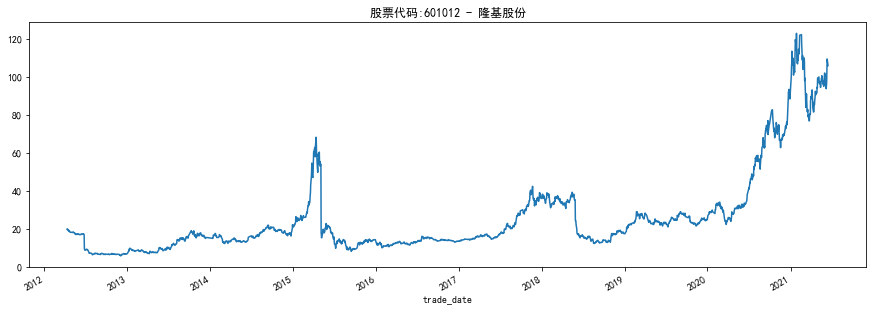

In [13]:
ticker_data['trade_date'] = pd.to_datetime(ticker_data['trade_date'],format='%Y%m%d')
ticker_data.sort_values(by='trade_date', inplace=True)
ticker_data.set_index('trade_date', inplace=True)
returns = ticker_data["close"].pct_change().dropna()

plt.figure(figsize=(15, 5))
plt.title("股票代码:601012 - 隆基股份", weight='bold')
ticker_data['close'].plot()

下面将画出每日收盘价的百分比变化图：

In [14]:
ticker_data['42d'] = np.round(ticker_data['close'].rolling(window=42).mean(),2)
ticker_data['252d'] = np.round(ticker_data['close'].rolling(window=252).mean(),2)

In [15]:
ticker_data[['close','42d','252d']].tail()

,close,42d,252d
trade_date,,,
2021-06-08,95.42,94.03,76.26
2021-06-09,97.12,94.22,76.52
2021-06-10,103.65,94.60,76.81
2021-06-11,109.50,95.21,77.11
2021-06-15,106.01,95.80,77.40


<AxesSubplot:xlabel='trade_date'>

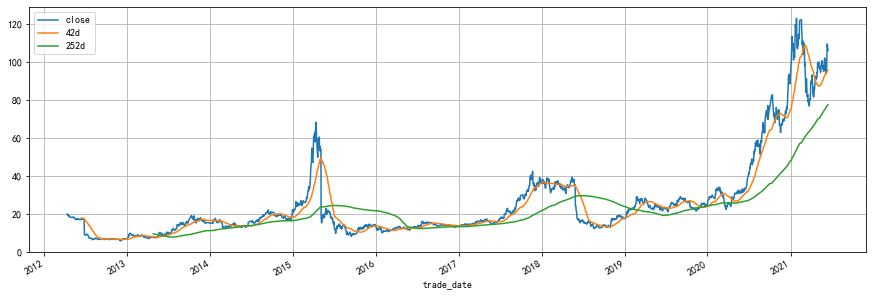

In [16]:
ticker_data[['close','42d','252d']].plot(grid=True, figsize=(15, 5))

In [17]:
ticker_data['42-252'] = ticker_data['42d'] - ticker_data['252d']
ticker_data['42-252'].tail()

trade_date
2021-06-08    17.77
2021-06-09    17.70
2021-06-10    17.79
2021-06-11    18.10
2021-06-15    18.40
Name: 42-252, dtype: float64

In [18]:
ticker_data['42-252'].head()

trade_date
2012-04-11   NaN
2012-04-12   NaN
2012-04-13   NaN
2012-04-16   NaN
2012-04-17   NaN
Name: 42-252, dtype: float64

In [19]:
SD = 1
ticker_data['Regime'] = np.where(ticker_data['42-252'] > SD, 1, 0)
ticker_data['Regime'] = np.where(ticker_data['42-252'] < -SD, -1, ticker_data['Regime'])
ticker_data['Regime'].value_counts()

 1    1253
 0     550
-1     389
Name: Regime, dtype: int64

(-1.1, 1.1)

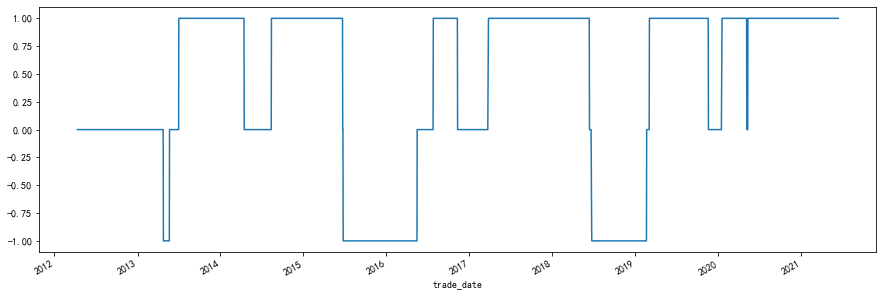

In [20]:
ticker_data['Regime'].plot(lw=1.5,figsize=(15, 5))
plt.ylim([-1.1, 1.1])

In [21]:
ticker_data['Market'] = np.log(ticker_data['close'] / ticker_data['close'].shift(1))

In [22]:
ticker_data['Strategy'] = ticker_data['Regime'].shift(1) * ticker_data['Market']

<AxesSubplot:xlabel='trade_date'>

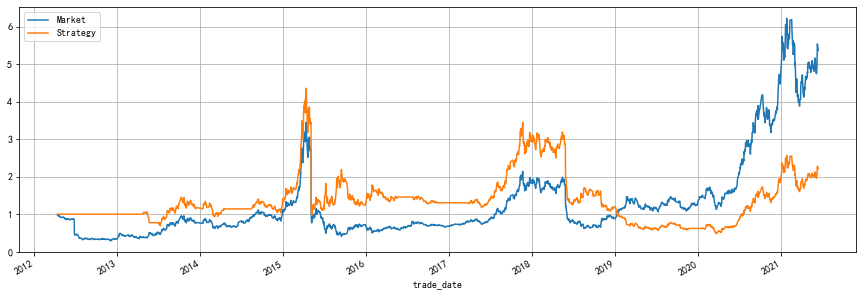

In [23]:
ticker_data[['Market', 'Strategy']].cumsum().apply(np.exp).plot(grid=True,figsize=(15, 5))

![](https://fenc.wang/imgs/2020/08/3565654bfbe9ffa0.png)